# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [2]:
x = np.linspace(-10, 10, 100)

y 自然是 $\sin(x)$。

In [24]:
y = np.sinc(x)

畫圖!

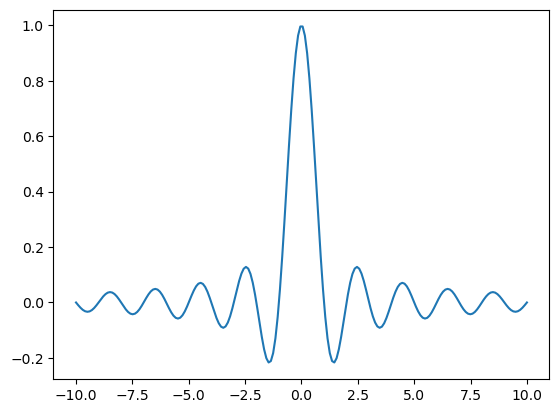

In [25]:
plt.plot(x,y)
plt.show()

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

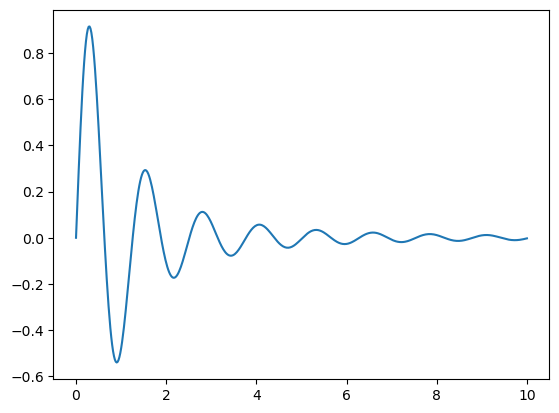

In [16]:
x = np.linspace(0, 10, 500)
y = np.sin(5*x) / (1 + x**2)
plt.plot(x, y)
plt.show()

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

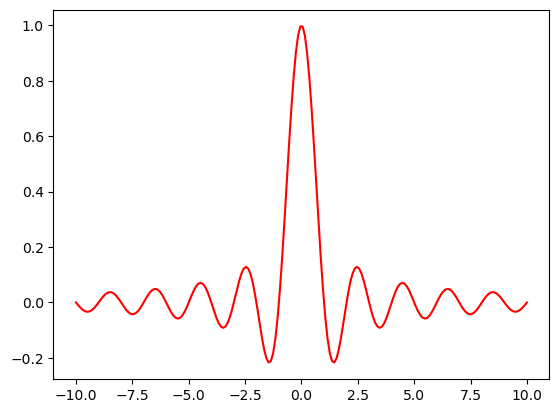

In [23]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x,y, 'r')  #'r' = red 
plt.show()

### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

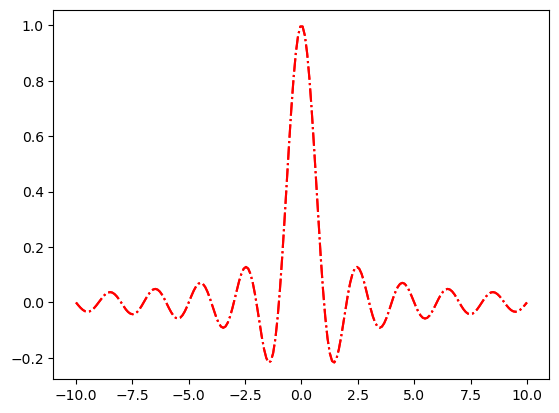

In [27]:
plt.plot(x,y, 'r-.') 
plt.show()

## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

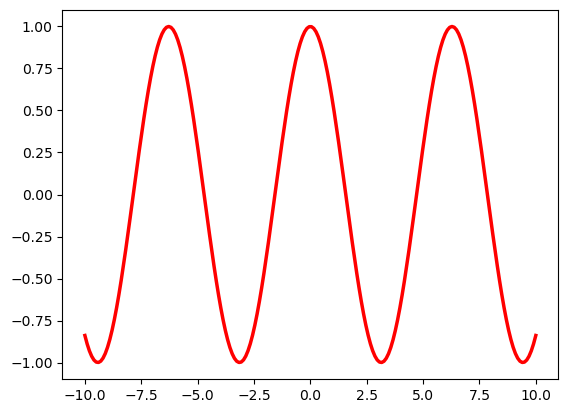

In [30]:
x = np.linspace(-10, 10, 200)
y = np.cos(x)
plt.plot(x,y, 'r', lw=2.5)  #'r' = red 
plt.show()

## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [31]:
r = 3
t = np.linspace(-2* np.pi, 2*np.pi, 200)

In [33]:
x = r * np.cos(t)
y = r * np.sin(t)

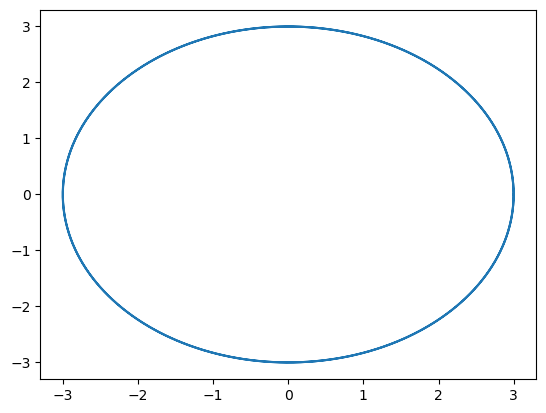

In [34]:
plt.plot(x,y)
plt.show()

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

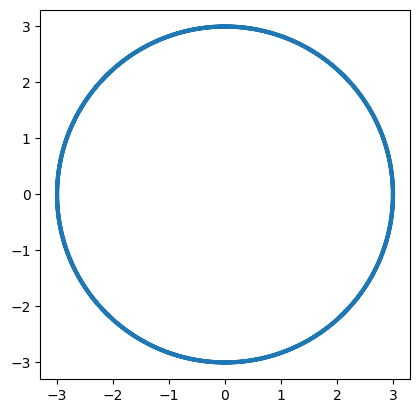

In [36]:
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x,y, lw=3)
plt.show()

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

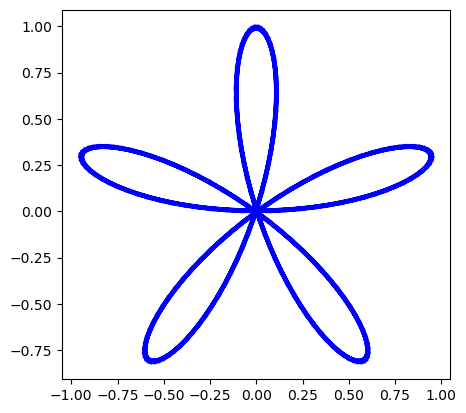

In [40]:
r = np.sin(5*t)
x = r*np.cos(t)
y = r*np.sin(t)
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x,y,'b',lw=3)
plt.show()

是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

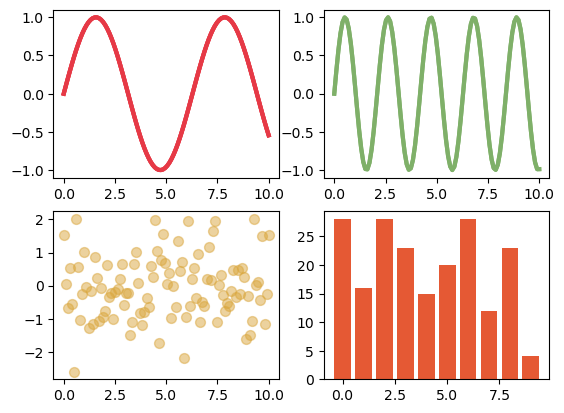

In [43]:
x = np.linspace(0,10,100)
plt.subplot(221)    #分成2x2的圖, 佔用第一個
plt.plot(x, np.sin(x), c='#e63946', lw=3)
plt.subplot(222) 
plt.plot(x, np.sin(3*x), c='#7fb069', lw=3)
plt.subplot(223) 
plt.scatter(x, np.random.randn(100), c='#daa73e', s=50, alpha=0.5)
plt.subplot(224) 
plt.bar(range(10), np.random.randint(1, 30, 10), fc='#e55934')
plt.show()

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

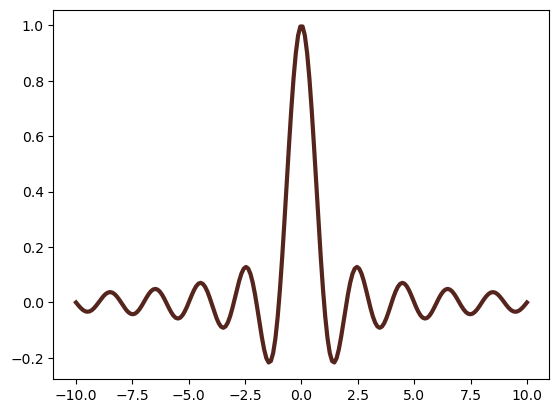

In [47]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y, c='#55251D', lw=3)
plt.show()

## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [48]:
x = range(20)
y= np.random.randn(20)

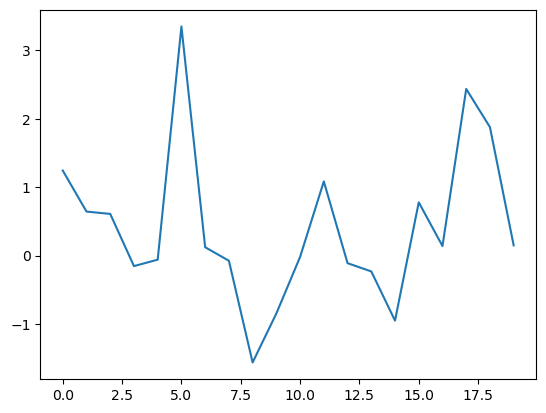

In [49]:
plt.plot(x, y)
plt.show()

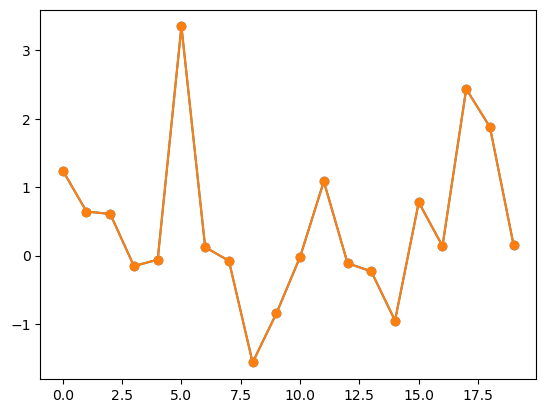

In [51]:
plt.plot(x, y, marker='o')
plt.show()

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

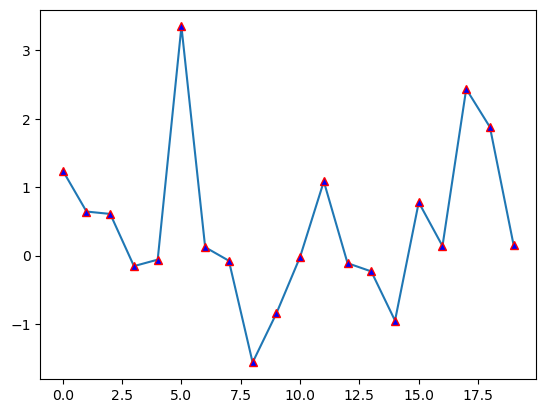

In [53]:
plt.plot(x, y, marker='^', mec='r', mfc='b', mfcalt='g')
plt.show()

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

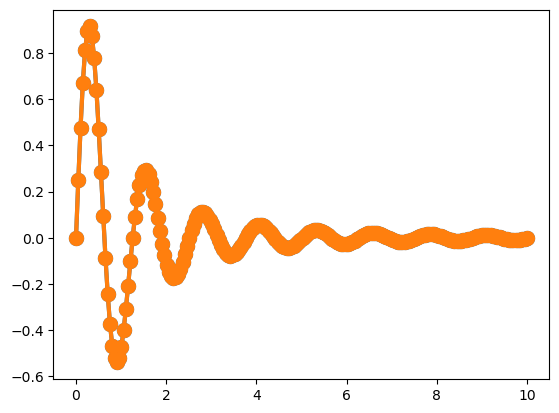

In [55]:
x = np.linspace(0, 10, 200)
y = np.sin(5*x) / (1+x**2)
plt.plot(x, y, lw=3, marker='o', ms=10)
plt.show()

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

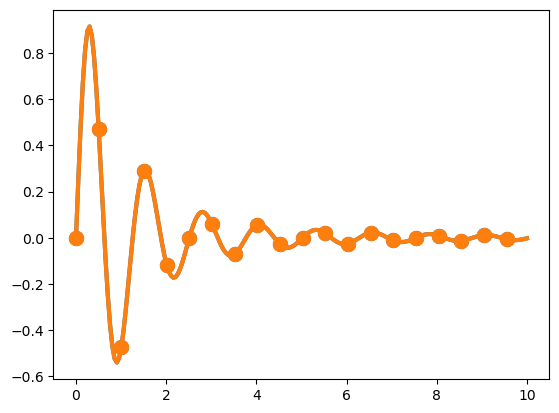

In [57]:
plt.plot(x, y, lw=3, marker='o', ms=10, markevery=10)
plt.show()

## 8 bar 風*

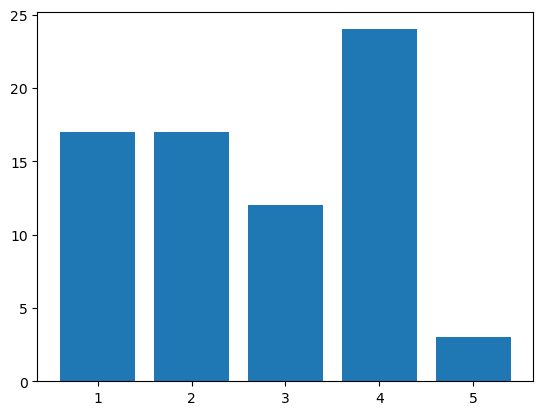

In [68]:
plt.bar(np.arange(1, 6), np.random.randint(1, 30, 5))
plt.show()

移一點點。

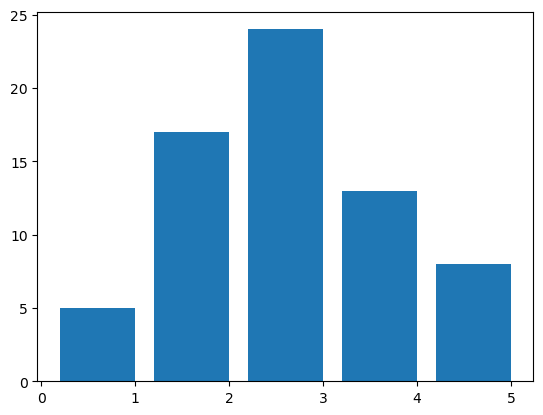

In [69]:
plt.bar(np.arange(0.6, 5), np.random.randint(1, 30, 5))
plt.show()

#### 雙色的長條圖

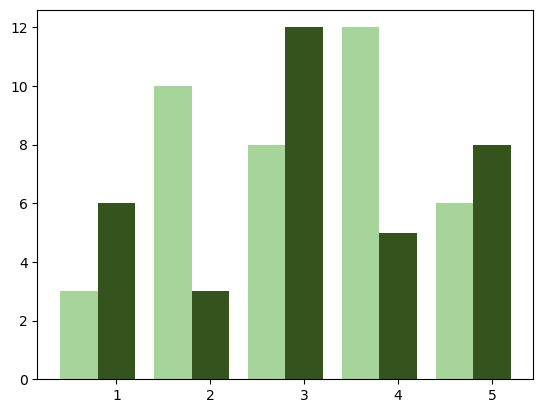

In [70]:
x = np.arange(1,6)
plt.bar(x-0.4, [3,10,8,12,6], width=0.4, ec='none', fc='#A7D49B')
plt.bar(x, [6,3,12,5,8], width=0.4, ec='none', fc='#35541D')
plt.show()

#### 疊加型的資料

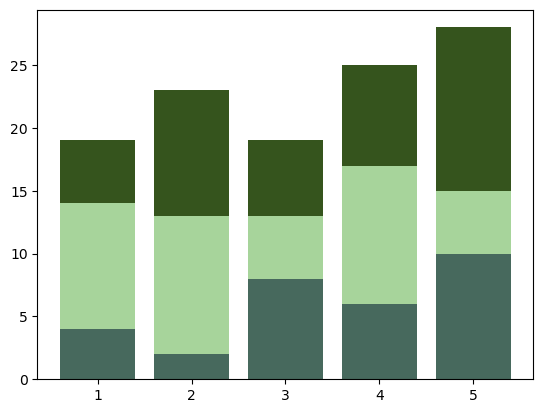

In [77]:
A = np.random.randint(2, 15, 5)
B = np.random.randint(2, 15, 5)
C = np.random.randint(2, 15, 5)

plt.bar(x, A,  fc='#47695D', ec='none')
plt.bar(x, B,  fc='#A7D49B', ec='none', bottom=A)
plt.bar(x, C,  fc='#35541D', ec='none', bottom=A+B)
plt.show()

#### 橫放的長條圖

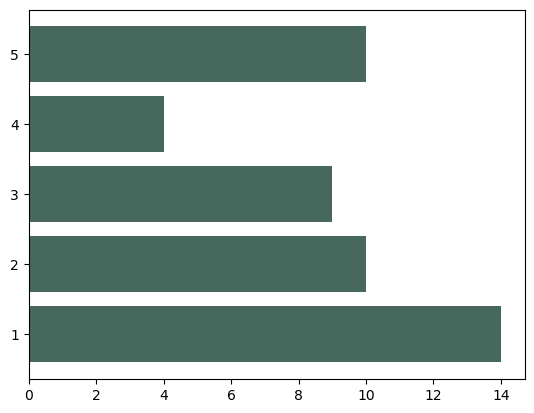

In [81]:
C = np.random.randint(2, 15, 5)
plt.barh(x, C,  fc='#47695D', ec='none')
plt.show()

#### 雙向的長條圖

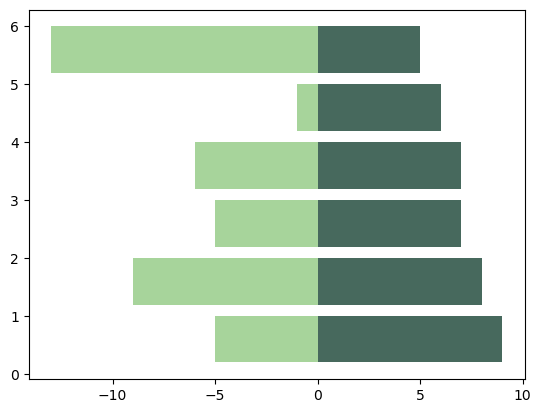

In [85]:
x = np.arange(0.6, 6)
A = np.random.randint(1,15,6)
B = np.random.randint(1,15,6)
plt.barh(x, A,  fc='#47695D', ec='none')
plt.barh(x, -B,  fc='#A7D49B', ec='none')
plt.show()

## 9 畫圖區的設定*

#### 說明文字的標示

In [86]:
x = np.linspace(-2* np.pi, 2*np.pi, 200)
y = np.sin(x)

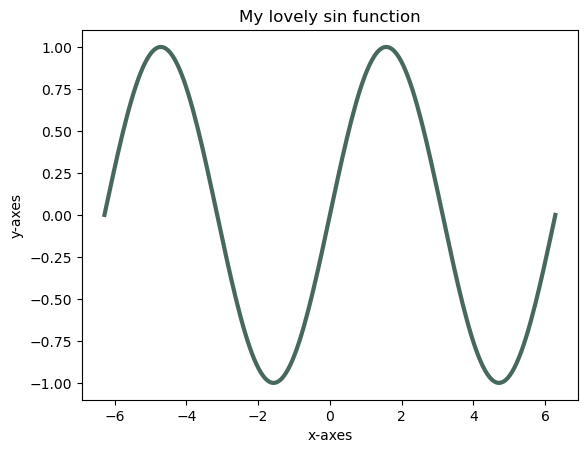

In [92]:
plt.title('My lovely sin function')
plt.xlabel('x-axes')
plt.ylabel('y-axes')
plt.plot(x, y, c='#47695D',lw=3)
plt.show()

#### 邊界的設定

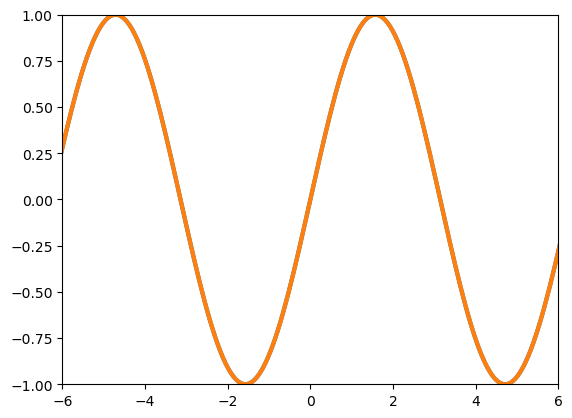

In [94]:
plt.xlim(-6, 6)
plt.ylim(-1, 1)
plt.plot(x,y,lw=3)
plt.show()

#### xticks

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\crowu\AppData\Local\Temp\ipykernel_19708\4003366248.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['$0$','$\pi/2$','$\pi$','$3*\pi/2$','$2\pi$'])
C:\Users\crowu\AppData\Local\Temp\ipykernel_19708\4003366248.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['$0$','$\pi/2$','$\pi$','$3*\pi/2$','$2\pi$'])
C:\Users\crowu\AppData\Local\Temp\ipykernel_19708\4003366248.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['$0$','$

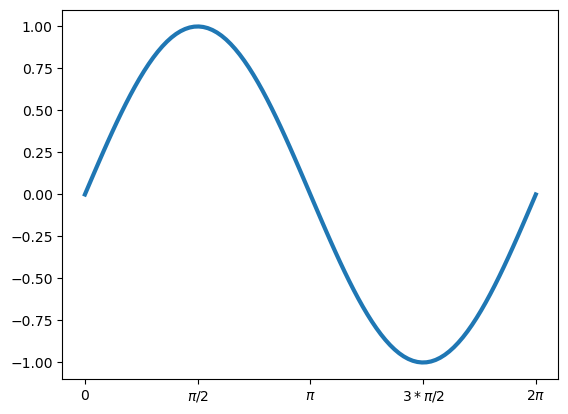

In [98]:
xv = np.linspace(0, 2*np.pi, 100)
yv = np.sin(xv)
plt.plot(xv, yv, lw=3)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['$0$','$\pi/2$','$\pi$','$3*\pi/2$','$2\pi$'])
plt.show()

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

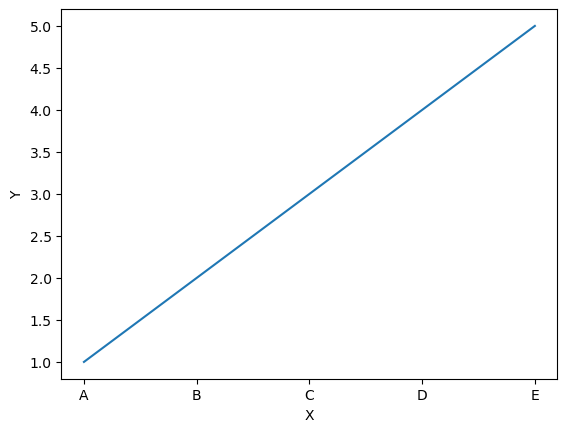

In [104]:
x = np.linspace(1, 5, 5)
y = x 
labels = ['A', 'B','C','D','E']
plt.plot(x, y)
plt.xticks(x, labels)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



#### 圖例 legend

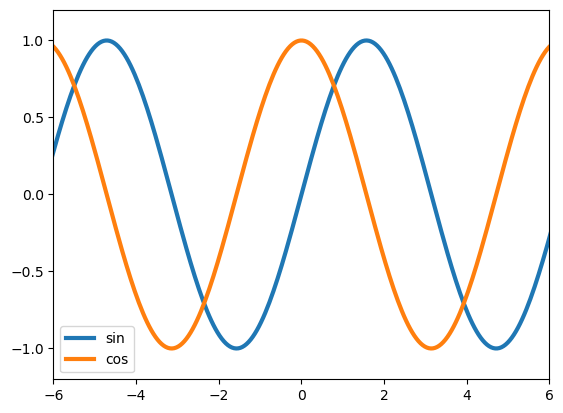

In [115]:
x1 = np.linspace(-10, 10, 400)
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.plot(x1, np.sin(x1), lw=3, label='sin')
plt.plot(x1, np.cos(x1), lw=3, label='cos')
plt.legend()
plt.show()

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。

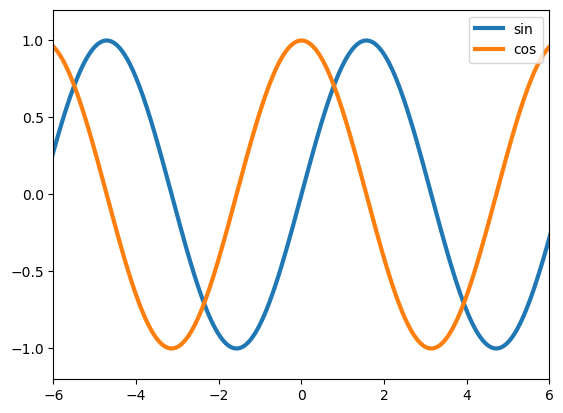

In [116]:
x1 = np.linspace(-10, 10, 400)
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.plot(x1, np.sin(x1), lw=3, label='sin')
plt.plot(x1, np.cos(x1), lw=3, label='cos')
plt.legend(loc=1)
plt.show()

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

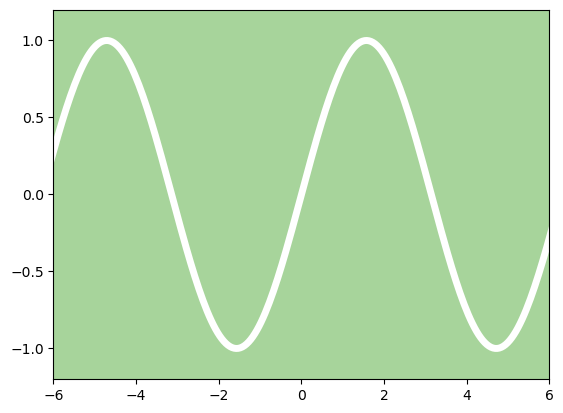

In [119]:
ax = plt.gca()
ax.set_facecolor('#A7D49B')
ax.set_xlim(-6, 6)
ax.set_ylim(-1.2, 1.2)
plt.plot(x1, np.sin(x1), lw=5, c='w')
plt.show()

#### 移動 x, y 座標軸

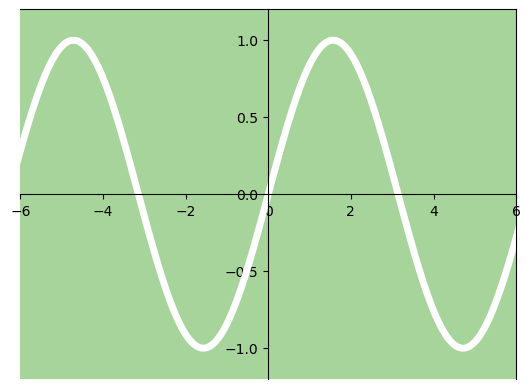

In [122]:
ax = plt.gca()
ax.set_facecolor('#A7D49B')
ax.set_xlim(-6, 6)
ax.set_ylim(-1.2, 1.2)

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
plt.plot(x1, np.sin(x1), lw=5, c='w')
plt.show()

## 11 耍寶可愛的 `xkcd`*

In [126]:
plt.xkcd()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

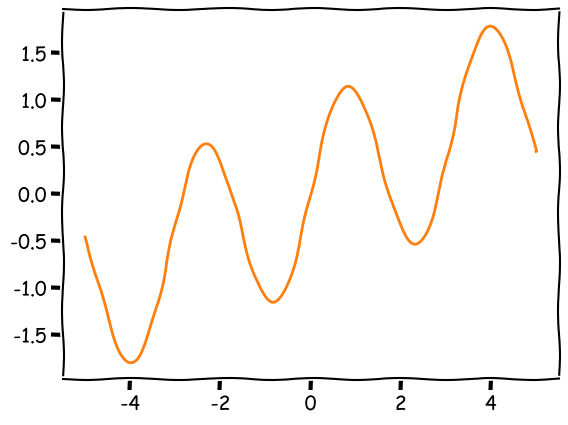

In [129]:
x3 = np.linspace(-5, 5, 200)
y3 = np.sin(2*x3)+0.2*x3
plt.plot(x3, y3)
plt.show()

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [135]:
import seaborn as sns 

然後像平常畫個圖。

In [136]:
sns.set(color_codes=True)

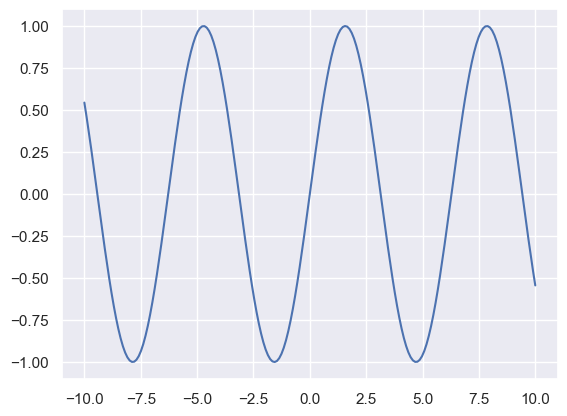

In [137]:
x4 = np.linspace(-10, 10, 200)
y4 = np.sin(x4)
plt.plot(x4, y4)
plt.show()

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)

In [133]:
plt.rcdefaults()